In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### **1. Loading the dataset into a DataFrame.**

In [3]:
df = pd.read_csv("https://drive.google.com/uc?id=1C9jVOk9EZFgwJ05buxn-YspDU7tl56rX")

In [ ]:
df

,id,region_id,region_city,all_region,start,end,start_year,start_month,start_day,start_hour,start_minute,start_second,end_year,end_month,end_day,end_hour,end_minute,end_second
0,52432,12,Львівська обл.,1,2022-02-24 07:43:17,2022-02-24 09:52:28,2022,2,24,7,43,17,2022,2,24,9,52,28
1,53292,23,Чернігівська обл.,1,2022-02-24 14:00:43,2022-02-24 17:11:43,2022,2,24,14,0,43,2022,2,24,17,11,43
2,52080,3,Вінницька обл.,1,2022-02-24 15:40:42,2022-02-24 16:10:42,2022,2,24,15,40,42,2022,2,24,16,10,42
3,52857,19,Харківська обл.,1,2022-02-24 20:11:47,2022-02-24 20:59:47,2022,2,24,20,11,47,2022,2,24,20,59,47
4,52700,18,Тернопільська обл.,1,2022-02-25 01:59:36,2022-02-25 09:00:19,2022,2,25,1,59,36,2022,2,25,9,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55782,158642,14,Одеська обл.,1,2025-03-01 21:49:30,2025-03-01 23:24:45,2025,3,1,21,49,30,2025,3,1,23,24,45
55783,158635,9,Київська обл.,1,2025-03-01 22:20:51,2025-03-02 01:38:57,2025,3,1,22,20,51,2025,3,2,1,38,57
55784,158636,9,Київ,0,2025-03-01 22:52:10,2025-03-02 00:55:18,2025,3,1,22,52,10,2025,3,2,0,55,18
55785,158617,3,Вінницька обл.,1,2025-03-01 23:26:07,2025-03-02 02:44:07,2025,3,1,23,26,7,2025,3,2,2,44,7


### **2. Display a table with the main statistical characteristics of quantitative features: minimum, maximum, mean, median, standard deviation.**

In [ ]:
df['start'] = pd.to_datetime(df['start_year'].astype(str) + '-' +
                             df['start_month'].astype(str) + '-' +
                             df['start_day'].astype(str) + ' ' +
                             df['start_hour'].astype(str) + ':' +
                             df['start_minute'].astype(str) + ':' +
                             df['start_second'].astype(str))

df['end'] = pd.to_datetime(df['end_year'].astype(str) + '-' +
                           df['end_month'].astype(str) + '-' +
                           df['end_day'].astype(str) + ' ' +
                           df['end_hour'].astype(str) + ':' +
                           df['end_minute'].astype(str) + ':' +
                           df['end_second'].astype(str))

In [ ]:
# Calculating the duration of events in hours
df['duration_hours'] = (df['end'] - df['start']).dt.total_seconds() / 3600

In [ ]:
df_num = df[[
    "start_year", "start_month", "start_day", "start_hour", "start_minute",
    "start_second", "end_year", "end_month", "end_day", "end_hour",
    "end_minute", "end_second", "duration_hours"
]]

In [ ]:
# Output the first and last date
df['start'].min()

Timestamp('2022-02-24 07:43:17')

In [ ]:
df['end'].max()

Timestamp('2025-03-02 02:44:07')

In [ ]:
# Derivation of minima
min_values = df_num.min()
min_values

,0
start_year,2022.000000
start_month,1.000000
start_day,1.000000
start_hour,0.000000
start_minute,0.000000
start_second,0.000000
end_year,2022.000000
end_month,1.000000
end_day,1.000000
end_hour,0.000000


In [ ]:
# Output maximums
max_values = df_num.max()
max_values

,0
start_year,2025.000000
start_month,12.000000
start_day,31.000000
start_hour,23.000000
start_minute,59.000000
start_second,59.000000
end_year,2025.000000
end_month,12.000000
end_day,31.000000
end_hour,23.000000


In [ ]:
# Derivation of averages
mean_values = df_num.mean()
mean_values

,0
start_year,2023.240361
start_month,6.416531
start_day,15.824672
start_hour,12.145500
start_minute,29.477602
start_second,29.597899
end_year,2023.240773
end_month,6.413699
end_day,15.830893
end_hour,11.676502


In [ ]:
# Output of general description
df_num.describe()

,start_year,start_month,start_day,start_hour,start_minute,start_second,end_year,end_month,end_day,end_hour,end_minute,end_second,duration_hours
count,55787.000000,55787.000000,55787.000000,55787.000000,55787.000000,55787.000000,55787.000000,55787.000000,55787.000000,55787.000000,55787.000000,55787.000000,55787.000000
mean,2023.240361,6.416531,15.824672,12.145500,29.477602,29.597899,2023.240773,6.413699,15.830893,11.676502,29.325398,29.483087,1.213557
std,0.906898,3.345250,8.800901,6.814517,17.382209,17.226540,0.906977,3.345140,8.801779,6.720395,17.245100,17.338922,1.550414
min,2022.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2022.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.001111
25%,2022.000000,3.000000,8.000000,7.000000,15.000000,15.000000,2022.000000,3.000000,8.000000,6.000000,14.000000,14.000000,0.442778
50%,2023.000000,6.000000,16.000000,12.000000,29.000000,30.000000,2023.000000,6.000000,16.000000,12.000000,30.000000,29.000000,0.662222
75%,2024.000000,9.000000,24.000000,18.000000,44.000000,44.000000,2024.000000,9.000000,24.000000,17.000000,44.000000,45.000000,1.411944
max,2025.000000,12.000000,31.000000,23.000000,59.000000,59.000000,2025.000000,12.000000,31.000000,23.000000,59.000000,59.000000,50.521667


### **3. Calculate the average values ​​of quantitative characteristics in the classes. For which characteristics do the average values ​​differ most significantly?**

In [ ]:
df_num.groupby('start_year').mean()

,start_month,start_day,start_hour,start_minute,start_second,end_year,end_month,end_day,end_hour,end_minute,end_second,duration_hours
start_year,,,,,,,,,,,,
2022,6.955644,16.189573,11.772554,28.950184,29.881602,2022.000614,6.949161,16.198717,11.842364,29.091920,29.269142,0.946576
2023,6.994897,15.853849,12.000000,29.373463,29.443495,2023.000430,6.992068,15.839400,11.690544,29.515310,29.412506,1.035742
2024,6.342468,15.765398,12.408397,29.866528,29.552987,2024.000323,6.340807,15.783806,11.740208,29.493656,29.629481,1.397313
2025,1.500626,14.404195,12.813400,29.788353,29.387289,2025.000000,1.506575,14.419537,10.411709,28.287727,29.830620,2.096904


**Growth of Duration:** A gradual increase in the average duration of alarms is observed, rising from 0.95 hours in 2022 to 2.10 hours in 2025.

**Stability of Start Time:** The start time of alarms remains more stable between 2022 and 2024, while there is a significant reduction in the average start times observed in 2025. Such a change in 2025 is related because we only have 3 months ago, with a longer time period the result may stabilize.


In [ ]:
df_num.groupby('start_month').mean()

,start_year,start_day,start_hour,start_minute,start_second,end_year,end_month,end_day,end_hour,end_minute,end_second,duration_hours
start_month,,,,,,,,,,,,
1,2024.160694,15.913064,12.337803,30.213410,29.239075,2024.160694,1.002312,15.933642,11.598150,28.729711,29.274682,1.449732
2,2024.004487,15.451110,12.693670,30.166509,29.519839,2024.004487,2.004960,15.424421,11.445914,29.184223,29.781294,1.428434
3,2023.084368,16.032688,12.710738,28.893718,29.666728,2023.084368,3.000183,16.071037,12.704164,29.716034,29.680058,1.063380
4,2023.001390,15.598564,12.457725,29.839240,29.916609,2023.001390,4.001390,15.593699,12.537642,29.487607,29.455409,0.957875
5,2023.092756,15.971637,11.807397,30.192794,30.132618,2023.092756,5.001150,15.986393,11.750096,27.897087,29.586623,1.113944
6,2023.128421,15.417987,11.845236,30.307265,29.462441,2023.128421,6.000823,15.452356,11.493929,28.332990,29.440831,1.033358
7,2023.152212,16.104906,11.874288,29.263031,29.545773,2023.152212,7.002409,16.093298,11.440648,29.626150,29.631625,1.086234
8,2023.058998,15.773442,11.886813,28.718883,29.182911,2023.058998,8.000185,15.823007,11.578694,29.970224,29.569447,1.040012
9,2023.069125,15.813488,11.943519,28.909168,29.671865,2023.069125,9.002107,15.825290,11.286828,30.042782,29.406955,1.162761


**Start Year:** Information across the months varies from 2023 to 2024.

**Start Day:** Dates are between the 15th and 16th of different months.

**Start Time:** Alarms begin at various times, mostly in the early afternoon.

**End Year:** Alarms end in the same timeframe, extending slightly into 2024.

**End Day:** Similar to start days, falling within the months of January to December.

**Duration in Hours:** Alarms generally last between 1 to 1.5 hours, with some exceptions.

### **4. Visualizations**

In [ ]:
df_columns = [
    "id", "region_id", "region_city", "all_region",
    "start", "end",
    "start_year", "start_month", "start_day", "start_hour", "start_minute",
    "start_second", "end_year", "end_month", "end_day", "end_hour",
    "end_minute", "end_second"
]

In [ ]:
print("Columns in file:", df.columns.tolist())

Columns in file: ['id', 'region_id', 'region_city', 'all_region', 'start', 'end', 'start_year', 'start_month', 'start_day', 'start_hour', 'start_minute', 'start_second', 'end_year', 'end_month', 'end_day', 'end_hour', 'end_minute', 'end_second', 'duration_hours']


In [ ]:
df.columns = df.columns.astype(str).str.strip()

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

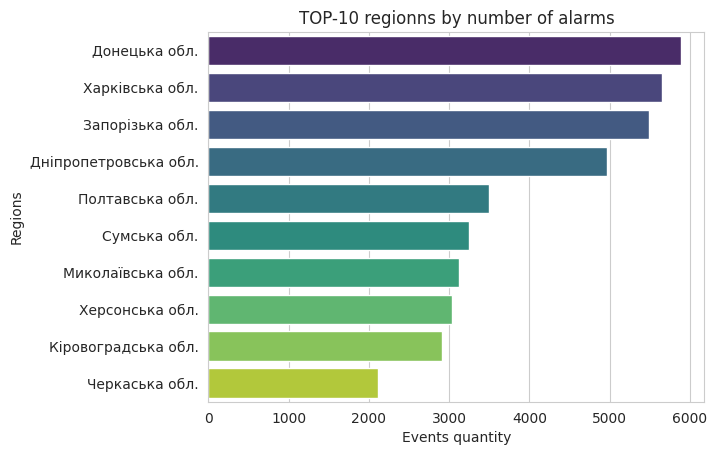

In [ ]:
top_regions = df["region_city"].value_counts().head(10)
sns.barplot(x=top_regions.values, y=top_regions.index, hue=top_regions.index, palette="viridis", legend=False)
plt.xlabel("Events quantity")
plt.ylabel("Regions")
plt.title("TOP-10 regionns by number of alarms")
plt.show()

*Most often, anxiety occurs in the following frontline areas: Донецька, Харківська, Запорізька, Дніпропетровська, because these are border areas where hostilities are ongoing. Also, KABs and barrel artillery are being used more actively here, which greatly increases the number of alarms.*



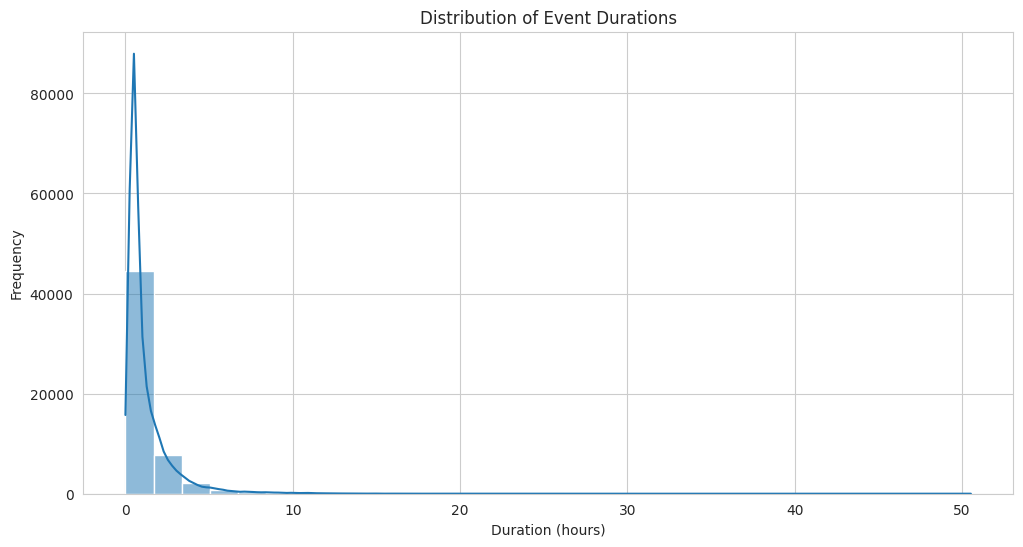

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df["duration_hours"], bins=30, kde=True)
plt.xlabel("Duration (hours)")
plt.ylabel("Frequency")
plt.title("Distribution of Event Durations")
plt.show()

*Most often, the alarms last about 1 hour.*

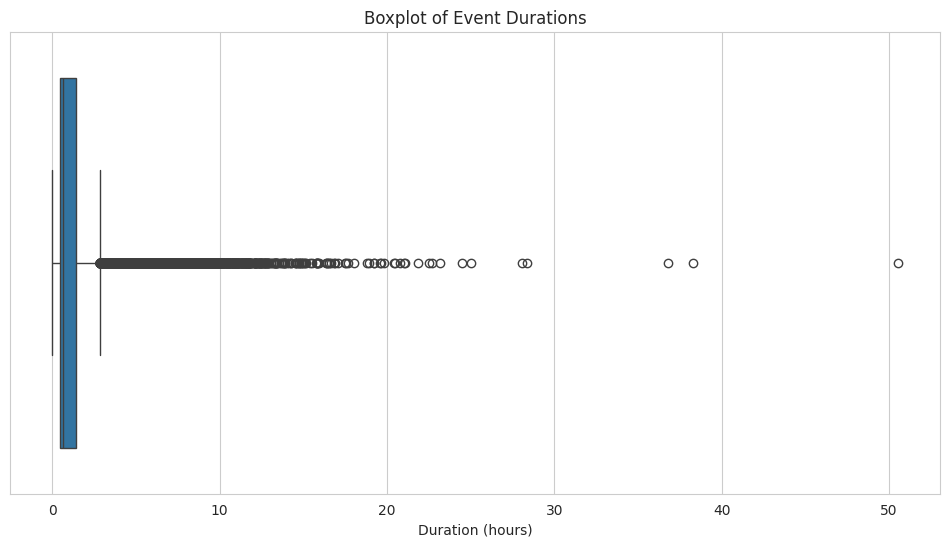

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["duration_hours"])
plt.xlabel("Duration (hours)")
plt.title("Boxplot of Event Durations")
plt.show()

*The graph is a box plot of event durations, showing that the majority of events have durations of less than 10 hours, but there are a significant number of outliers and durations reaching 50 hours, which are not indicative of anomalous values ​​in the data.*

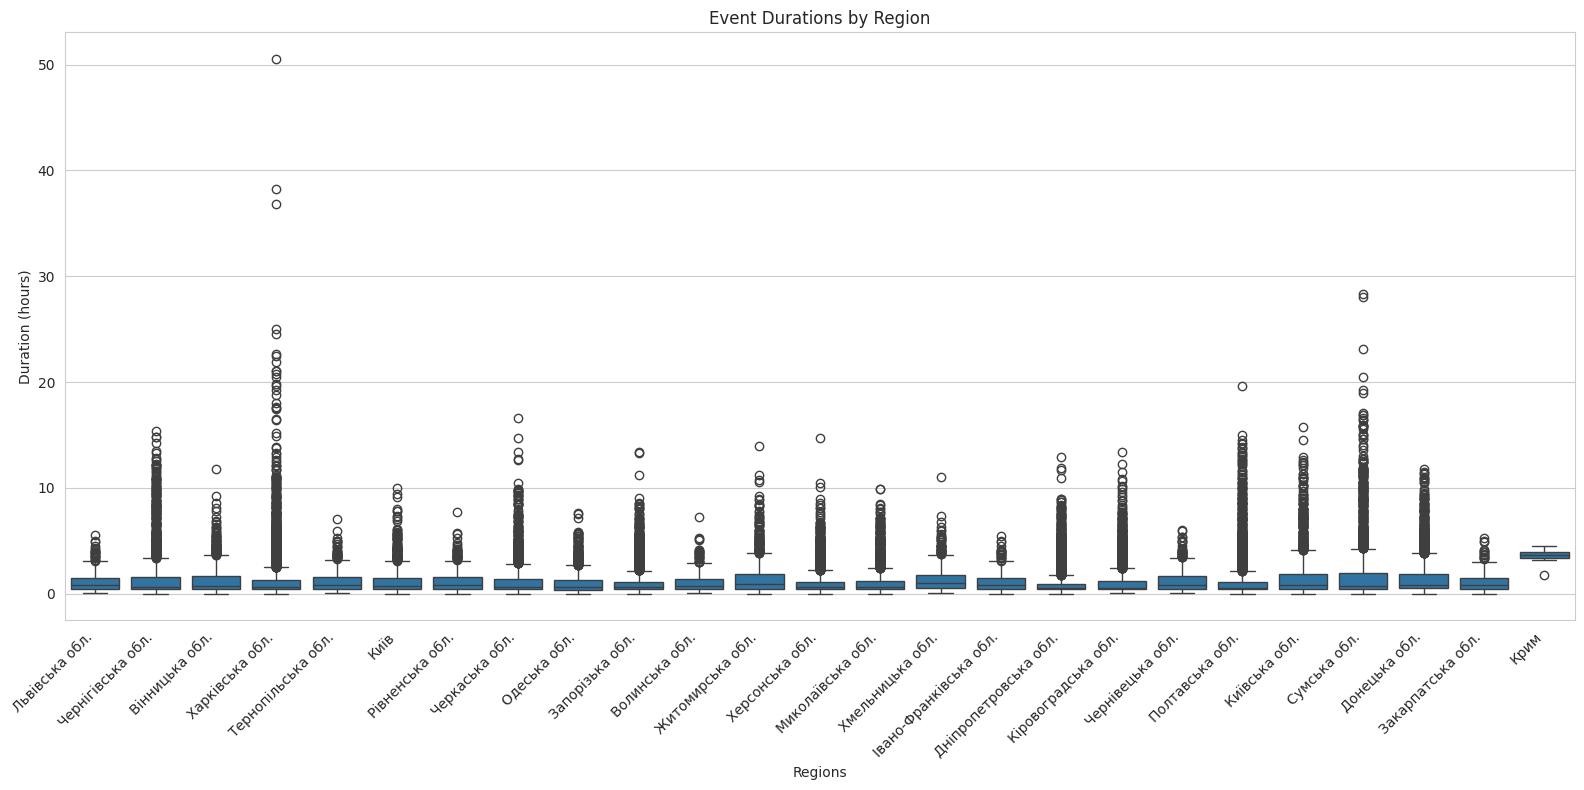

In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(x="region_city", y="duration_hours", data=df)
plt.xlabel("Regions")
plt.ylabel("Duration (hours)")
plt.title("Event Durations by Region")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

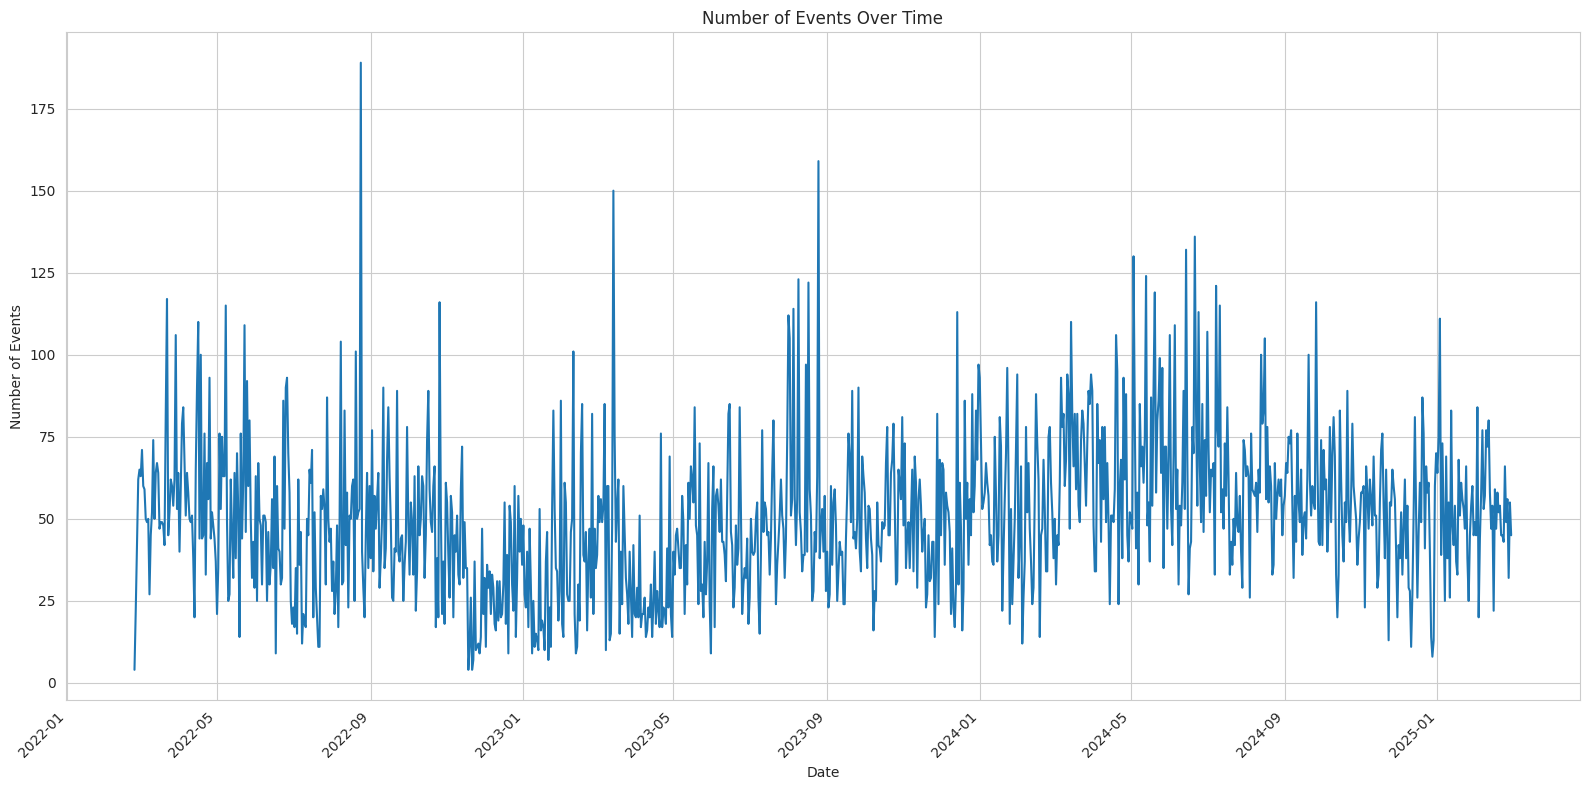

In [ ]:
df["start_date"] = df["start"].dt.date
daily_counts = df["start_date"].value_counts().sort_index()

plt.figure(figsize=(16, 8))
plt.plot(daily_counts.index, daily_counts.values)
plt.xlabel("Date")
plt.ylabel("Number of Events")
plt.title("Number of Events Over Time")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

*Peak values: During certain periods (e.g. September 2023), significant peaks are recorded, when the number of events exceeds 150. This is associated with the Kharkiv counteroffensive. Seasonality: The number of events fluctuates, with noticeable spikes and dips, which may indicate seasonal influences or external factors. Possible explanations: Peaks may be related to specific events occurring at that time, or to other variables such as weather conditions, social or economic changes, depletion of the enemy’s combat potential due to active actions. A decrease in the number of events during certain periods may indicate suppression or lack of activity during these periods.*

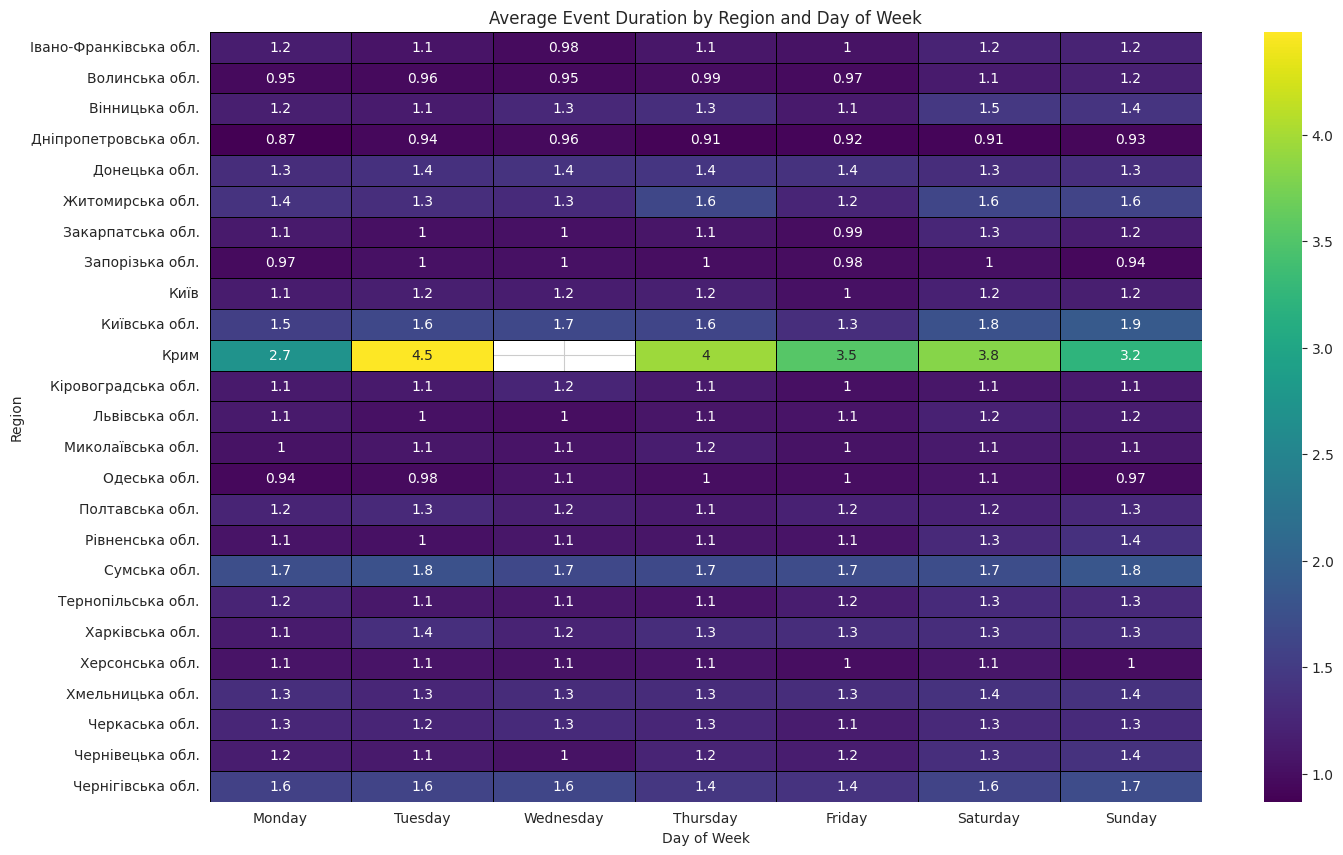

In [ ]:
df['day_of_week'] = df['start'].dt.day_name()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
             'Saturday', 'Sunday']
df['day_of_week'] = pd.Categorical(df['day_of_week'],
                                   categories=day_order, ordered=True)

pivot_table = df.pivot_table(values='duration_hours', index='region_city',
                             columns='day_of_week', aggfunc='mean',
                             observed=False)

plt.figure(figsize=(16, 10))
sns.heatmap(pivot_table, annot=True, cmap='viridis', linewidths=.5,
                linecolor='black')
plt.title('Average Event Duration by Region and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Region')
plt.show()

*General structure:*

The graph represents the average duration of events in different regions of Ukraine by day of the week.
A color scale is used to display the data: from dark purple (lower values) to yellow-green (higher values).

*Regions with the highest indicators:*

Крим: Stands out with high values, especially on Monday (3.2) and Wednesday (4.5).
Київ: Has consistently average indicators, with a peak on Monday (1.5).

*Regions with the lowest indicators:*

Дніпропетровська область: The lowest value on Sunday (0.87).

Волинська та Закарпатська область: Has indicators close to 1.
Trends by day of the week:

*Most regions show a decrease in the duration of events on Sunday.
On Monday, an increase in the duration is observed for some regions, in particular for Криму.*

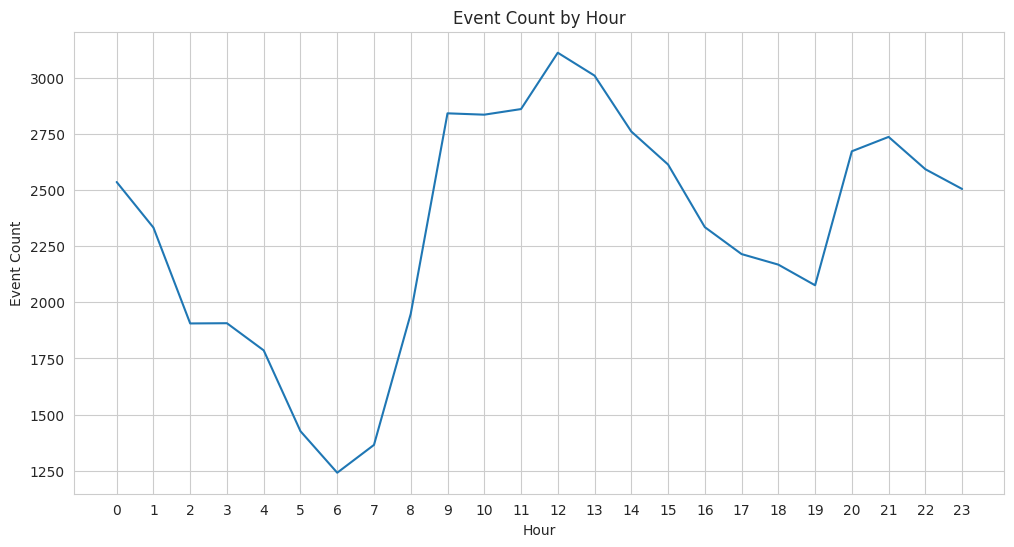

In [ ]:
df['hour'] = df['start'].dt.hour
hourly_counts = df['hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(hourly_counts.index, hourly_counts.values)
plt.xlabel('Hour')
plt.ylabel('Event Count')
plt.title('Event Count by Hour')
plt.xticks(range(24))
plt.show()

*The highest number of events reaches over 3,000, around 12 noon.
The lowest number is observed at night, especially between 1 and 5 am.
The number of events fluctuates throughout the day, with some decrease in the morning and increase at noon.*

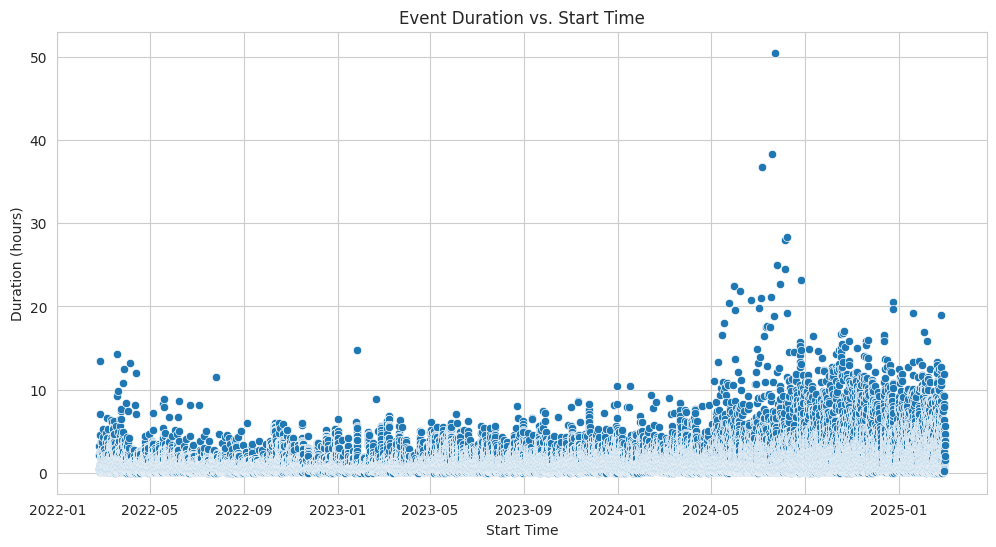

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='start', y='duration_hours', data=df)
plt.xlabel('Start Time')
plt.ylabel('Duration (hours)')
plt.title('Event Duration vs. Start Time')
plt.show()

*Most events last up to 10 hours, with a few exceptions exceeding 20 hours.
It is noticeable that the number of events lasting more than 30 hours increases in 2024.
There is a trend towards an increase in the duration of events, especially in 2024.*

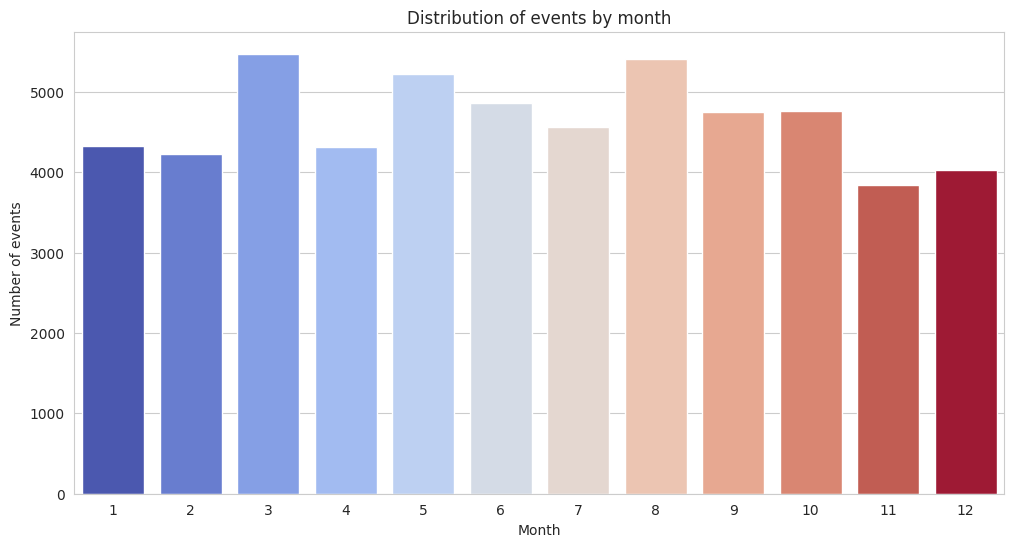

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df["start_month"], palette="coolwarm", hue=df["start_month"], legend=False)
plt.xlabel("Month")
plt.ylabel("Number of events")
plt.title("Distribution of events by month")
plt.show()

*The highest activity was in March.
Summer (July) has the lowest number of events.
Overall, the graph shows variations in the number of events throughout the year, with peaks in early spring.*

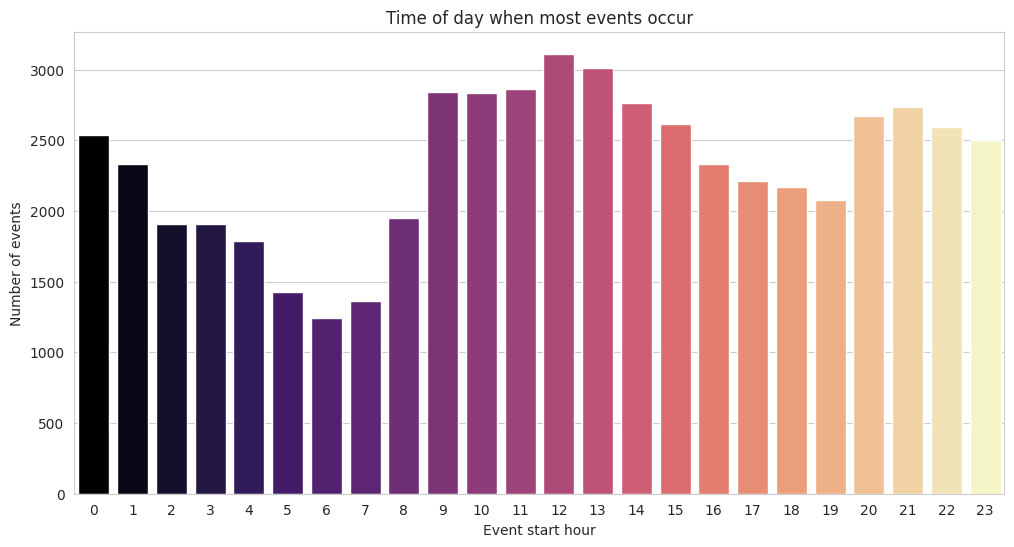

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df["start_hour"], hue=df["start_hour"], palette="magma", legend=False)
plt.xlabel("Event start hour")
plt.ylabel("Number of events")
plt.title("Time of day when most events occur")
plt.show()

*Maximum events: The highest number of events is observed between 10:00 and 14:00, with a peak around 12:00 (over 3000 events).
Decreasing number: After 14:00, the number of events gradually decreases.
Minimum events: The lowest number of events is observed at night, especially between 0:00 and 5:00.*

*Trends:
It is likely that the increase in activity in the morning hours is related to working hours and increased social activity*

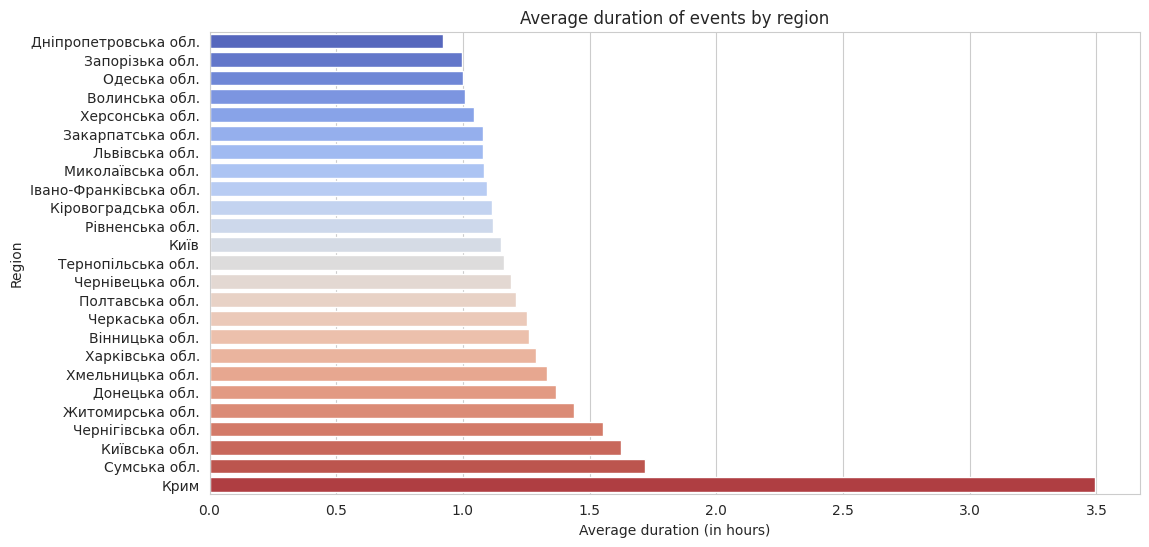

In [ ]:
avg_duration_per_region = df.groupby('region_city')['duration_hours'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_duration_per_region.values,
            y=avg_duration_per_region.index,
            hue=avg_duration_per_region.index,
            palette="coolwarm",
            legend=False)

plt.xlabel("Average duration (in hours)")
plt.ylabel("Region")
plt.title("Average duration of events by region")
plt.show()

**Highest Duration:** The regions with the longest average event durations include Крим, Сумську, Київську, Чернігівську, Житомирську області each about 2 hours. This suggests a potentially higher engagement or more substantial activities occurring in these areas. For example, Київська область often serves as a hub for drones, where they fly at a lower altitude to make it harder to detect and then fly to Kyiv or other regions that are previously less visible to radar systems.

**Mid-range Duration:** Regions such as Київ, Чернівецька та Полтавська області show moderate event durations, with averages falling around 1.5 hours. This may indicate a balance of both engaging and shorter events.

***Lowest Duration:*** Дніпропетровська область shows the shortest average event duration, approximately 0.8 hours, indicating less involvement or fewer significant events taking place there. Artillery shelling and ballistic missile launches typically do not last very long, unlike shaheeds. Therefore, drone attacks are likely to be infrequent in this region..

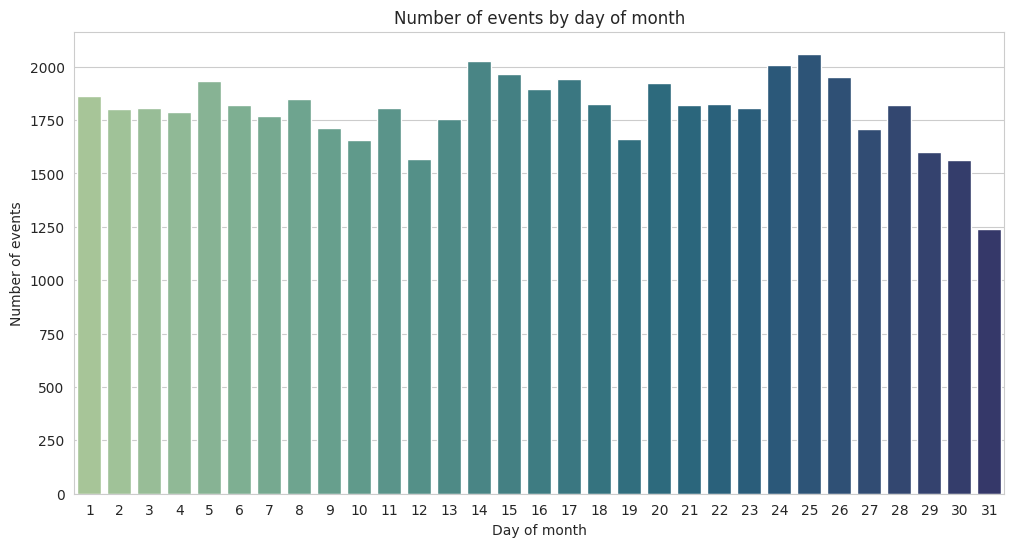

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df["start_day"], hue=df["start_day"], palette="crest", legend=False)
plt.xlabel("Day of month")
plt.ylabel("Number of events")
plt.title("Number of events by day of month")
plt.show()

*The highest activity of events is observed from the 14th to the 25th, with a peak of about 2000 events.
On the days at the beginning and end of the month (1, 2, 30, 31), the number of events is significantly lower.*

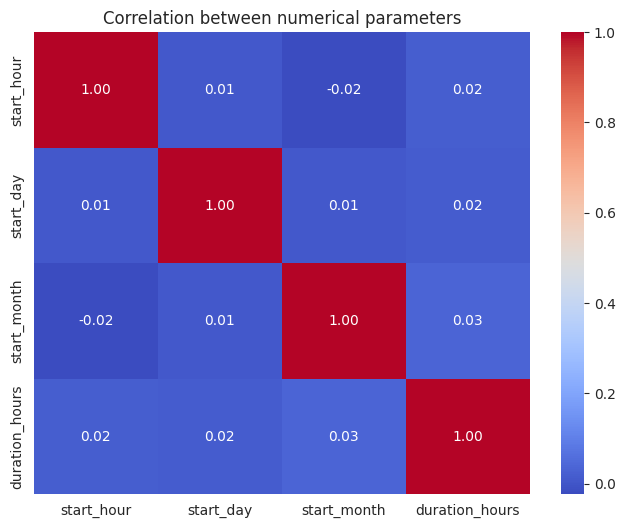

In [ ]:
numeric_cols = ["start_hour", "start_day", "start_month", "duration_hours"]
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between numerical parameters")
plt.show()

**Key Observations:**

*start_hour correlates positively with:
duration_hours (0.02)
start_day and start_month show weak correlations with each other and with other parameters (all below |0.03|).
There are no strong correlations observed among these parameters, as all values are relatively low.*

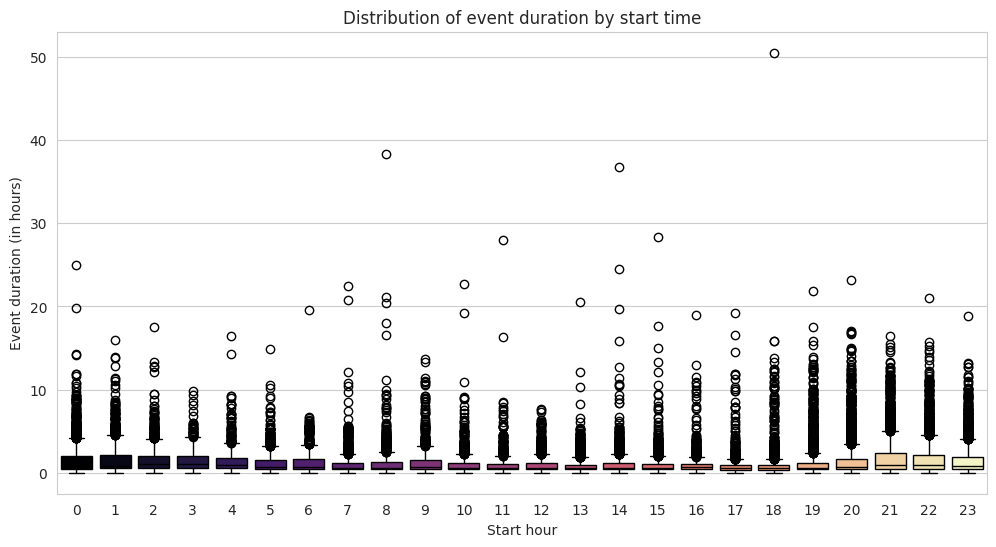

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["start_hour"], y=df["duration_hours"], hue=df["start_hour"], palette="magma", legend=False)
plt.xlabel("Start hour")
plt.ylabel("Event duration (in hours)")
plt.title("Distribution of event duration by start time")
plt.show()

*Most event durations are relatively short, clustered around lower values (0 to 10 hours).
There are noticeable outliers that suggest that some events start later in the day and have longer durations, particularly in the evening hours (around 18 to 23).*